## Problem: PERTURBATION
+ **Find square-root of 10:**
\begin{equation}  \sqrt{10} = ?  \end{equation}

+ **Polynomial equation:**
\begin{equation} [ x^2-9-\epsilon = 0] --->(1) \end{equation}
where $\epsilon$ = 1

In [1]:
import numpy as np
import scipy as sp
from sympy import *
from sympy import solve
import numpy.polynomial.polynomial as root
import math as mt
import pandas as pd
import matplotlib.pyplot as plt

### Defining function and its derivative:

**Perturbation-method:**
+ Expanding **x** in powers **$\epsilon$.**
\begin{equation} x = (x_0 + \epsilon*x_1 + \epsilon^2*x_2 + \epsilon^3*x_3 + ... ) \end{equation}
+ Substituting in equation(1):
\begin{equation} (x_0 + \epsilon*x_1 + \epsilon^2*x_2 + \epsilon^3*x_3 + ... )^2 - 9 -\epsilon = 0\end{equation}
+ Seperating powers of $\epsilon$:
\begin{equation} (x_0^2-9) + \epsilon(2*x_0*x_1-1) + \epsilon^2(x_1^2 + 2*x_0*x_2) + ...  = 0\end{equation}
+ Since, $\epsilon$ is **arbitrary** each term must be individually equal to zero:
\begin{equation} (x_0^2-9) = 0 \end{equation}
\begin{equation} (2*x_0*x_1-1) = 0 \end{equation}
\begin{equation} (x_1^2 + 2*x_0*x_2)=0 ...\end{equation}
+ Solving for x_0,x_1...
\begin{equation} x_0 = {3,-3} --(1)\end{equation}
\begin{equation} x_1 = \frac{1}{2*x_0} = {\frac{1}{6},\frac{-1}{6}}--(2) \end{equation}
\begin{equation} x_2 = \frac{-x_1^2}{2*x_0} = {\frac{-1}{216},\frac{1}{216}}--(3) \end{equation}
\begin{equation} x_3 = \frac{-x_2^2}{2*x_1}--(4)  \end{equation}
\begin{equation} x_4 = \frac{-x_3^2}{2*x_2}..  \end{equation}


+  Observing that untill eqution (2) there are no patterns but after that there is an **emerging pattern:**

\begin{equation} x_(n) = \frac{-(x_(n-1))^2}{2*x_(n-2)} \end{equation}

In [2]:
def SolveP(x, e_max, ϵ):
    ext = mt.sqrt(10)
    err = 1
    temp1 = 0
    temp2 = [sum(x[0:1]), sum(x[0:2])]               # temp2 stores cummulative sum of x values.Since, ϵ = 1.
    error = [np.abs(temp2[0]-ext),np.abs(temp2[1]-ext)]
    while(err>=e_max):
        i = len(x)                                  # i is incremented from initial len(x)
        temp1 = -(0.5*x[i-1]**2)/(x[i-2])
        
        x.append(temp1*(ϵ)**i)
        temp2.append(sum(x))
        '''
        Error: is not b/w excat_solution and perturbed_sol(temp2), it diff b/w current and previous Solutions. 
        '''
        err = np.abs(temp2[i-1]-temp2[i])
        error.append(err)
    return (x,temp2,error)
        

In [10]:
max_error = 1e-10
ϵ1  = 1
x1  = [3,1/6]
s1,ss1,error1 = SolveP(x1, max_error, ϵ1)

In [11]:
dict1 = {"Sol_ϵ=1":ss1,"Error":error1 ,"x(n)_values":s1 }
df1 = pd.DataFrame(dict1)
ERROR1 = np.abs(ss1[len(ss1)-1]-mt.sqrt(10))

print("\nMAX_ERROR:     ", ERROR1)
print("Converged sol: ", ss1[len(ss1)-1])
print("Excat sol:     ", mt.sqrt(10))
print('\n', df1)


MAX_ERROR:      0.00030447546446810136
Converged sol:  3.1619731847039114
Excat sol:      3.1622776601683795

     Sol_ϵ=1         Error   x(n)_values
0  3.000000  1.622777e-01  3.000000e+00
1  3.166667  4.389006e-03  1.666667e-01
2  3.162037  4.629630e-03 -4.629630e-03
3  3.161973  6.430041e-05 -6.430041e-05
4  3.161973  4.465306e-07  4.465306e-07
5  3.161973  1.550454e-09  1.550454e-09
6  3.161973  2.691625e-12 -2.691760e-12


### Plotting:

In [ ]:
%matplotlib inline
%config InlineBackend.fig_format = 'svg'

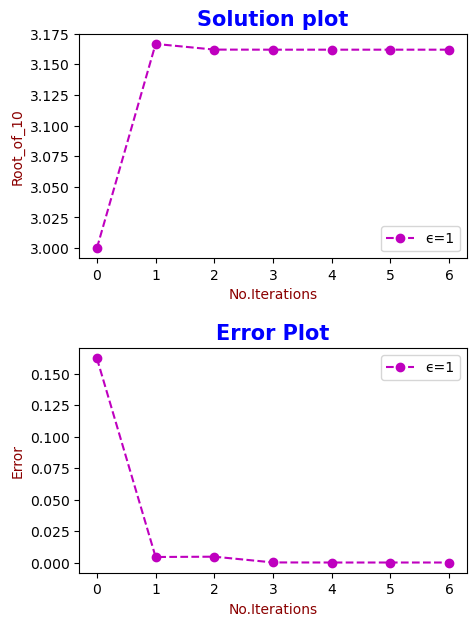

In [12]:
plt.figure(figsize=(5,7))

# Solution-plot
fig1 = plt.subplot(2,1,1)
plt.plot(np.arange(0,len(ss1),1),ss1, "m--o", label ="ϵ=1")
plt.title("Solution plot", fontweight ="bold", fontsize=15, color="blue")
plt.ylabel("Root_of_10", fontsize=10,color="darkred")
plt.xlabel("No.Iterations", fontsize=10,color="darkred")
plt.subplots_adjust(hspace=0.4)
plt.legend()

# Error-plot
plt.subplot(2,1,2)
plt.plot(np.arange(0,len(error1),1),error1,"m--o",label="ϵ=1")
plt.title("Error Plot", fontweight ="bold", fontsize=15,color = "blue")
plt.ylabel("Error", fontsize=10,color="darkred")
plt.xlabel("No.Iterations", fontsize=10,color="darkred")
plt.legend()